# Conclusions and Visuals
We will now use everthing we learned about this lesson to tackle the fuel economy dataset we cleaned and manipulated from last lesson. Use the space below to address questions on datasets `clean_08.csv` and `clean_18.csv`.
Answer the questions below:
  * Are more unique models using alternative fuels in 2018 compared to 2008? By how much?
  * How much have vehicle classes improved in fuel economy (increased in mpg)?
  * What are the characteristics of SmartWay vehicles? Have they changed over time? (mpg, greenhouse gas)
  * What features are associated with better fuel economy (mpg)?

In [50]:
# inport pandas
import pandas as pd
%matplotlib inline

In [51]:
# load datasets
df_08 = pd.read_csv('./clean_08.csv')
df_18 = pd.read_csv('./clean_18.csv')

In [52]:
df_08.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


In [53]:
#datatype and misssing data 
df_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 987 non-null    object 
 1   displ                 987 non-null    float64
 2   cyl                   987 non-null    int64  
 3   trans                 987 non-null    object 
 4   drive                 987 non-null    object 
 5   fuel                  987 non-null    object 
 6   veh_class             987 non-null    object 
 7   air_pollution_score   987 non-null    float64
 8   city_mpg              987 non-null    float64
 9   hwy_mpg               987 non-null    float64
 10  cmb_mpg               987 non-null    float64
 11  greenhouse_gas_score  987 non-null    int64  
 12  smartway              987 non-null    object 
dtypes: float64(5), int64(2), object(6)
memory usage: 100.4+ KB


In [54]:
#datatype and misssing data 
df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 832 non-null    object 
 1   displ                 832 non-null    float64
 2   cyl                   832 non-null    int64  
 3   trans                 832 non-null    object 
 4   drive                 832 non-null    object 
 5   fuel                  832 non-null    object 
 6   veh_class             832 non-null    object 
 7   air_pollution_score   832 non-null    float64
 8   city_mpg              832 non-null    float64
 9   hwy_mpg               832 non-null    float64
 10  cmb_mpg               832 non-null    float64
 11  greenhouse_gas_score  832 non-null    int64  
 12  smartway              832 non-null    object 
dtypes: float64(5), int64(2), object(6)
memory usage: 84.6+ KB


### Q1: Are more unique models using alternative sources of fuel? By how much?

Let's first look at what the sources of fuel are and which ones are alternative sources.

In [55]:
df_08.fuel.value_counts()

Gasoline    984
CNG           1
ethanol       1
gas           1
Name: fuel, dtype: int64

In [72]:
df_18.fuel.value_counts()


Gasoline       749
Ethanol         26
Gas             26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

Looks like the alternative sources of fuel available in 2008 are CNG and ethanol, and those in 2018 ethanol and electricity. (You can use Google if you weren't sure which ones are alternative sources of fuel!)

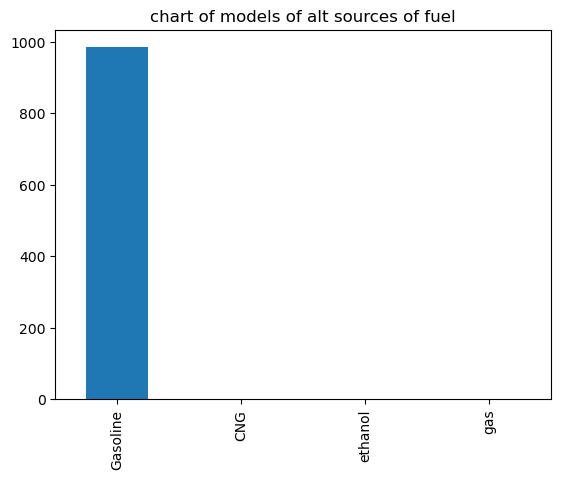

In [93]:
# how many unique models used alternative sources of fuel in 2008
alt_08 = df_08.query('fuel in ["CNG", "ethanol"]').model.nunique()
alt_08
df_08.fuel.value_counts().plot(kind='bar',title='chart of models of alt sources of fuel');

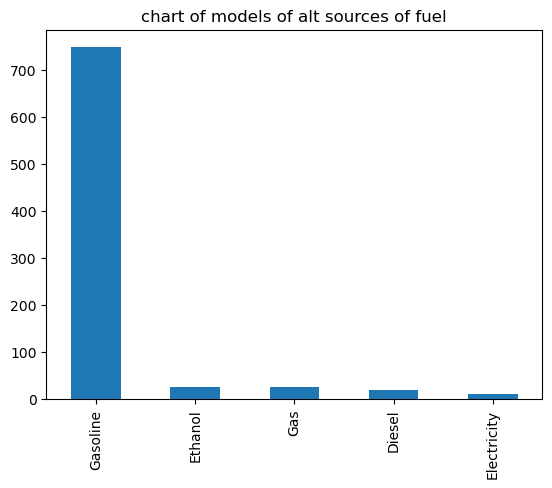

In [91]:
# how many unique models used alternative sources of fuel in 2018
alt_18 = df_18.query('fuel in ["Ethanol", "Electricity"]').model.nunique()
alt_18
df_18.fuel.value_counts().plot(kind='bar',title='chart of models of alt sources of fuel');

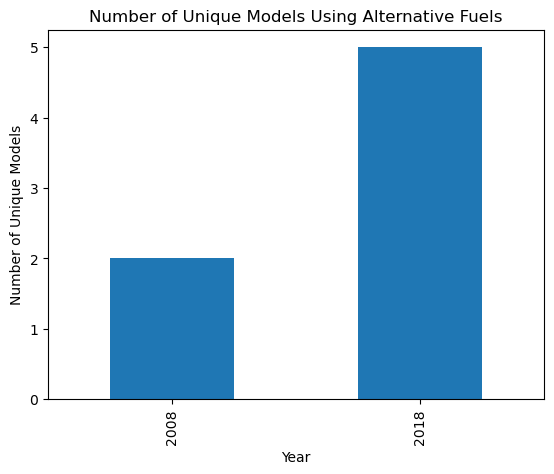

In [94]:
# Create a bar chart with both 2008 and 2018 alternative source numbers
pd.DataFrame({
    'year':['2008','2018'],
    'model_num':[alt_08,alt_18]
}).plot(
     kind='bar',
     x='year',
     title='Number of Unique Models Using Alternative Fuels',
     legend=False,
    xlabel='Year',
    ylabel='Number of Unique Models'
              );

Since 2008, the number of unique models using alternative sources of fuel increased by 24. We can also look at proportions.

In [95]:
# total unique models each year
total_08 = df_08.model.nunique()
total_18 = df_18.model.nunique()
total_08, total_18

(377, 357)

In [96]:
# Find the proportion of alternative models by the total number of models for 2008 and 2018
prop_08 = alt_08 / total_08
prop_18 = alt_18 / total_18
prop_08, prop_18

(0.005305039787798408, 0.014005602240896359)

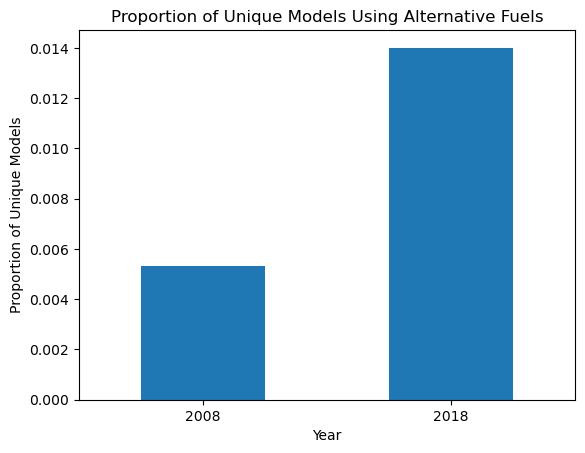

In [97]:
# Create a bar chart with both 2008 and 2018 proportion values
pd.DataFrame(
    {"year": ["2008", "2018"], "model_num": [prop_08, prop_18]}
).plot(
    kind="bar",
    x="year",
    title="Proportion of Unique Models Using Alternative Fuels",
    legend=False,
    xlabel="Year",
    ylabel="Proportion of Unique Models",
    rot=0
);

### Q2: How much have vehicle classes improved in fuel economy?  

Let's look at the average fuel economy for each vehicle class for both years.

In [ ]:
# group by veh_class and find the mean of cmb_mpg
veh_08 = 
veh_08

In [ ]:
veh_18 = 
veh_18

In [ ]:
# Find how much they've increased by for each vehicle class
# Take the difference of veh_18 and veh_08 to find the increase
inc = veh_18 - veh_08
inc

In [ ]:
# Drop any NaN values to only plot the classes that exist in both years
inc.dropna(inplace=True)
# Create a bar chart to show the increase for vehicle types 
inc.plot(
    kind="bar",
    x="year",
    title="Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class",
    legend=False,
    xlabel="Vehicle Class",
    ylabel="Increase in Average Combined MPG",
    rot=0,
    figsize=(8, 5)
);

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

We can analyze this by filtering each dataframe by SmartWay classification and exploring these datasets.

In [ ]:
# smartway labels for 2008
df_08.smartway.unique()

In [ ]:
# get all smartway vehicles in 2008
smart_08 = 

In [ ]:
# explore smartway vehicles in 2008
smart_08.describe()

Use what you've learned so for to further explore this dataset on 2008 smartway vehicles.

In [ ]:
# smartway labels for 2018
df_18.smartway.unique()

In [ ]:
# get all smartway vehicles in 2018
smart_18 = 

In [ ]:
smart_18.describe()

Use what you've learned so for to further explore this dataset on 2018 smartway vehicles.

In [ ]:
# Create a bar chart to find average cmb_mpg of smartway vehicles
pd.DataFrame(
    {"year": ["2008", "2018"], "model_num": [smart_08["cmb_mpg"].mean(), smart_18["cmb_mpg"].mean()]}
).plot(
    kind="bar",
    x="year",
    title="Average Combined MPG from Smartway Vehicles from 2008 and 2018",
    legend=False,
    xlabel="Year",
    ylabel="Avg cmb_mpg",
    rot=0
);

### Q4: What features are associated with better fuel economy?

You can explore trends between cmb_mpg and the other features in this dataset, or filter this dataset like in the previous question and explore the properties of that dataset. For example, you can select all vehicles that have the top 50% fuel economy ratings like this.

In [ ]:
# Create the top 50% by finding cmb_mpg >= the average cmb_mpg
# Create the bottom 50% by finding cmb_mpg < the average cmb_mpg
top_08 = 
bottom_08 = 
top_08.describe()

In [ ]:
# Create the top 50% by finding cmb_mpg >= the average cmb_mpg
# Create the bottom 50% by finding cmb_mpg < the average cmb_mpg
top_18 = 
bottom_18 = 
top_18.describe()

In [ ]:
# Plot a bar chart showing top and bottom metrics for 2008 and 2018
# Make sure to use numeric_only=True when geting the mean as we only
# want features that are numbers
pd.DataFrame(
    {
        "Bottom 2008": bottom_08.mean(numeric_only=True),
        "Bottom 2018": bottom_18.mean(numeric_only=True),
        "Top 2008": top_08.mean(numeric_only=True),
        "Top 2018": top_18.mean(numeric_only=True),
    },
    index=top_18.mean(numeric_only=True).index
).plot(
    kind="bar",
    title="Average Vehicle Features Separated by 50% Above or Below cmb_mpg",
    legend=True,
    xlabel="Feature",
    ylabel="Average value of feature",
    rot=0,
    figsize=(12, 8)
);